# 0. 라이브러리 로드

In [32]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 로드

In [43]:
estate_volume_df = pd.read_excel(r'dataset\seoul_estate_volume_201001_202408.xlsx').T
estate_volume_df.columns = estate_volume_df.iloc[0]
estate_volume_df = estate_volume_df.iloc[1:].reset_index().rename(columns={'index' : 'date'})

estate_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    176 non-null    object
 1   전체      176 non-null    object
 2   아파트     176 non-null    object
 3   연립주택    176 non-null    object
 4   다세대주택   176 non-null    object
 5   다가구주택   176 non-null    object
 6   단독주택    176 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


In [44]:
estate_volume_df

구분,date,전체,아파트,연립주택,다세대주택,다가구주택,단독주택
0,'10.01,7061,3870,367,1939,245,640
1,'10.02,8366,4719,415,2379,220,633
2,'10.03,10322,5075,559,3428,328,932
3,'10.04,8380,3695,475,3050,304,856
4,'10.05,6712,2811,401,2425,298,777
...,...,...,...,...,...,...,...
171,'24.04,7898,4840,225,2443,138,252
172,'24.05,8445,5182,346,2551,101,265
173,'24.06,9091,6150,224,2331,113,273
174,'24.07,12783,9518,280,2528,140,317


# 3. 데이터 확인
* 주택 유형 별 거래량 추세 파악 (아파트 vs 비아파트)
* 기간: 2010년 1월 ~ 2024년 8월

In [45]:
estate_volume_df['date'] = pd.to_datetime(estate_volume_df['date'].map(lambda x: '20'+x[1:].replace('.', '')), format='%Y%m')
estate_volume_df

구분,date,전체,아파트,연립주택,다세대주택,다가구주택,단독주택
0,2010-01-01,7061,3870,367,1939,245,640
1,2010-02-01,8366,4719,415,2379,220,633
2,2010-03-01,10322,5075,559,3428,328,932
3,2010-04-01,8380,3695,475,3050,304,856
4,2010-05-01,6712,2811,401,2425,298,777
...,...,...,...,...,...,...,...
171,2024-04-01,7898,4840,225,2443,138,252
172,2024-05-01,8445,5182,346,2551,101,265
173,2024-06-01,9091,6150,224,2331,113,273
174,2024-07-01,12783,9518,280,2528,140,317


In [46]:
estate_volume_df['비아파트'] = estate_volume_df['연립주택'] + estate_volume_df['다세대주택'] + estate_volume_df['다가구주택'] + estate_volume_df['단독주택']
estate_volume_df

구분,date,전체,아파트,연립주택,다세대주택,다가구주택,단독주택,비아파트
0,2010-01-01,7061,3870,367,1939,245,640,3191
1,2010-02-01,8366,4719,415,2379,220,633,3647
2,2010-03-01,10322,5075,559,3428,328,932,5247
3,2010-04-01,8380,3695,475,3050,304,856,4685
4,2010-05-01,6712,2811,401,2425,298,777,3901
...,...,...,...,...,...,...,...,...
171,2024-04-01,7898,4840,225,2443,138,252,3058
172,2024-05-01,8445,5182,346,2551,101,265,3263
173,2024-06-01,9091,6150,224,2331,113,273,2941
174,2024-07-01,12783,9518,280,2528,140,317,3265


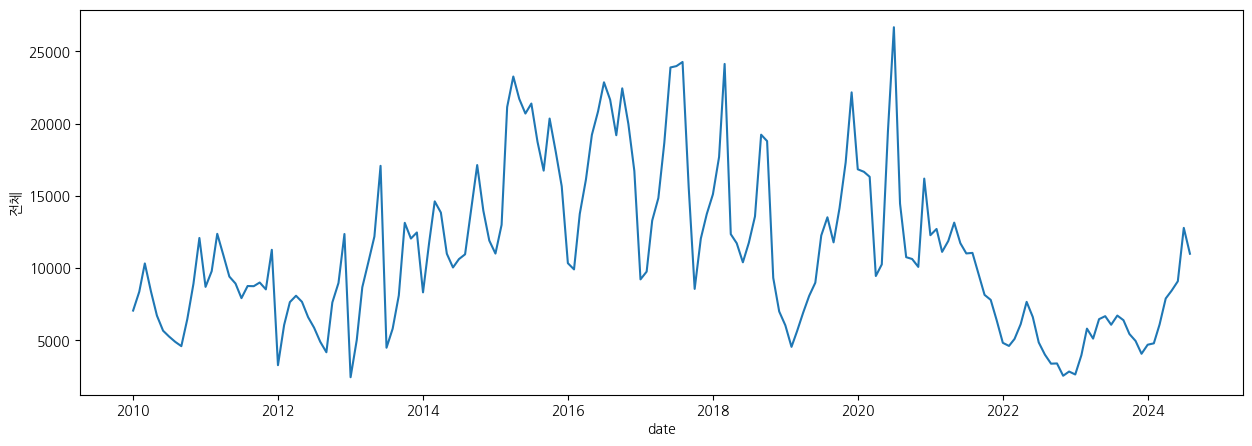

In [47]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=estate_volume_df, x='date', y='전체')

plt.show()

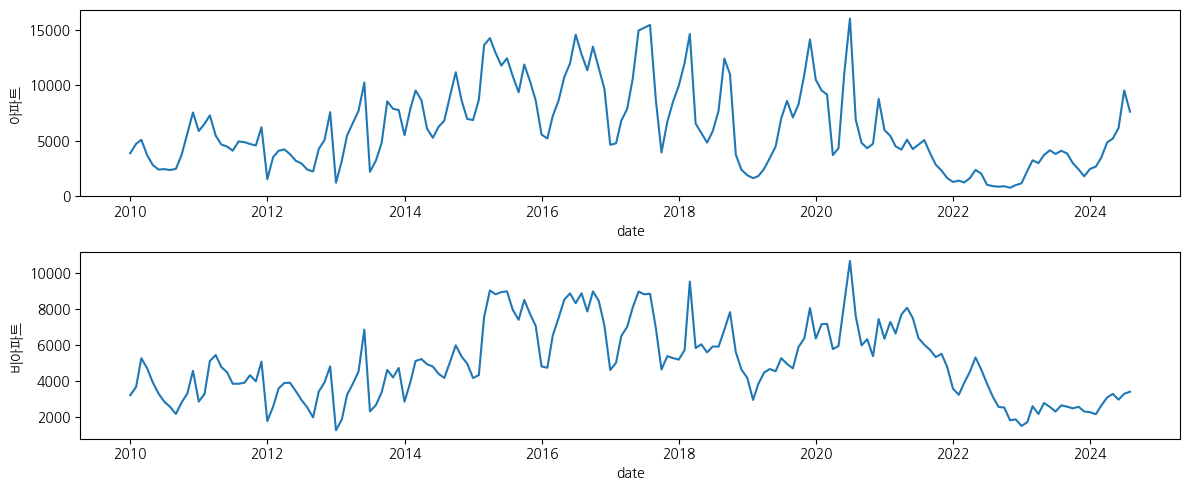

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5))
sns.lineplot(data=estate_volume_df, x='date', y='아파트', ax=axes[0])
sns.lineplot(data=estate_volume_df, x='date', y='비아파트', ax=axes[1])

plt.tight_layout()
plt.show()